labeled_temp_feat['date'][0] 2018-01-31 00:10:00
last_train_date 2018-01-31 00:10:00
first_test_date 2020-01-21 22:00:00
last_train_date 2020-01-21 22:00:00
first_test_date 2020-02-27 23:20:00
current_minute 2020-01-21 22:00:00
Total number of instances 109148
The number of training instances 103812
The number of test instances 5336
labeled_temp_feat                       date  max_temp_10_min  min_temp_10_min  \
0      2018-01-31 00:10:00        20.723264        18.585998   
1      2018-01-31 00:20:00        20.785159        18.713738   
2      2018-01-31 00:30:00        20.190654        18.773051   
3      2018-01-31 00:40:00        20.208956        18.939912   
4      2018-01-31 00:50:00        20.083399        19.404427   
...                    ...              ...              ...   
109143 2020-02-27 22:40:00        20.375105        19.023487   
109144 2020-02-27 22:50:00        20.613113        19.433738   
109145 2020-02-27 23:00:00        21.102557        19.399657   
109146 

      Iter       Train Loss   Remaining Time 
         1       25550.1048           28.84m
         2       23859.4631           28.98m
         3       22780.9240           29.03m
         4       22076.0954           29.13m
         5       21631.2840           29.12m
         6       21316.8978           29.11m
         7       21111.3028           29.16m
         8       20968.2167           29.22m
         9       20859.6735           29.22m
        10       20775.2011           29.14m
        20       20366.1110           32.33m
        30       20179.1064           32.05m
        40       19992.7750           33.51m
        50       19822.5282           33.35m
        60       19677.4142           33.54m
        70       19521.5003           32.86m
        80       19348.7193           32.07m
        90       19220.8984           31.41m
       100       19027.5495           31.46m
       200       17462.7923           28.69m
       300       16171.1086           26.24m
       40

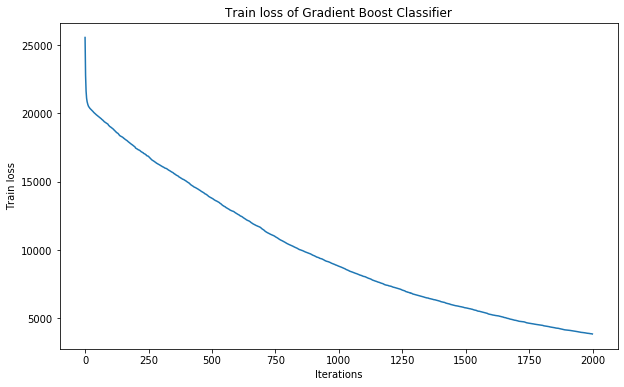

In [1]:
'''
Editor: @Hyunhomo
Source: https://github.com/mohyunho/abnormal_temperature_prediction

Load merged&labeled features and train machine learning model
'''
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from datetime import datetime
from sklearn.ensemble import GradientBoostingClassifier

## Load features from csv files
labeled_temp_feat = pd.read_csv('labeled_temp_feat.csv')
labeled_temp_feat['date'] = pd.to_datetime(labeled_temp_feat['date'], format="%Y-%m-%d %H:%M:%S")



## Function to derive current time with the format of pandas timestamp '%Y-%m-%d %H:%M:00' 
def current_time():
    ct = datetime.now()
    ct_minute = ct.strftime('%Y-%m-%d %H:00:00')
#     ct_ts = pd.to_datetime(ct_minute)
    ct_ts = pd.Timestamp(ct_minute, freq='t')
    return ct_ts

## Generate a fixed frequency DatetimeIndex
# Set current time(minute) as the threshold for training/test dataset split 
current_minute = current_time()

print ("labeled_temp_feat['date'][0]", labeled_temp_feat['date'][0] )

threshold_dates = [[labeled_temp_feat['date'][0],current_minute ],
                   [current_minute, labeled_temp_feat['date'].iloc[-1]]]

for last_train_date, first_test_date in threshold_dates:
    print ("last_train_date", last_train_date)
    print("first_test_date", first_test_date)


print ("current_minute", current_minute)
print ("Total number of instances", len(labeled_temp_feat['date']))
print ("The number of training instances", np.where(labeled_temp_feat['date']==current_minute)[0][0]+1)
print ("The number of test instances", len(labeled_temp_feat['date']) - (np.where(labeled_temp_feat['date']==current_minute)[0][0]+1) )

print ("labeled_temp_feat",  labeled_temp_feat)

# make test and training splits
test_results = []
models = []
last_train_date = current_minute
first_test_date  = current_minute
print ("last_train_date", last_train_date)
# split out training and test data
train_y = labeled_temp_feat.loc[labeled_temp_feat['date'] < last_train_date, 'label']
print ("train_y", train_y)
train_X = pd.get_dummies(labeled_temp_feat.loc[labeled_temp_feat['date']  < last_train_date].drop(['date',
                                                                                                    'label'], 1))

print ("train_X", train_X)
test_X = pd.get_dummies(labeled_temp_feat.loc[labeled_temp_feat['date'] > first_test_date].drop(['date',
                                                                                                'label'], 1))


# train and predict using the model, storing results for later
filename = 'Temp_GB_PdM_model.sav'
try:
    f = open(filename)
    # Do something with the file
    print("Trained model already exists")
    my_model = pickle.load(open(filename, 'rb'))

except IOError:
    # print("File not accessible")
    # print("Initialize a model")
    my_model = GradientBoostingClassifier(random_state=42, learning_rate=0.2, n_estimators=2000, verbose=1)
    print("Training in progress...")
    my_model.fit(train_X, train_y)
    print ("Train finished")
    # save trained model
    pickle.dump(my_model, open(filename, 'wb'))
    
train_loss = my_model.train_score_
# print ("train_loss_", train_loss)
# print ("train loss dtype", train_loss.dtype)


## plot training loss curve
plt.figure(figsize=(10,6))
plt.plot(train_loss)
plt.title('Train loss of Gradient Boost Classifier')
plt.ylabel('Train loss')
plt.xlabel('Iterations')
plt.show()
    
    

In [2]:
# # train and predict using the model, storing results for later
# filename = 'Temp_SVM_PdM_model.sav'
print ("x")
# try:
#     f = open(filename)
#     # Do something with the file
#     print("Trained model already exists")
#     my_model = pickle.load(open(filename, 'rb'))

# except IOError:
#     # print("File not accessible")
#     # print("Initialize a model")
#     my_model = GradientBoostingClassifier(random_state=42, learning_rate=0.2, n_estimators=150, verbose=1)
#     print("Training in progress...")
#     my_model.fit(train_X, train_y)
#     print ("Train finished")
#     # save trained model
#     pickle.dump(my_model, open(filename, 'wb'))

x
